In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Titanic Dataset Description**

This dataset contains information about passengers who traveled on the Titanic. Each row represents one passenger, and the data is used to analyze survival patterns based on factors like age, gender, ticket class, fare paid, and family members onboard. It is commonly used in data analysis and machine learning to predict whether a passenger survived the disaster.

Column-wise Explanation:

 1.PassengerId – Unique ID assigned to each passenger.

 2.Survived – Survival status (0 = Did not survive, 1 = Survived).

 3.Pclass – Passenger ticket class (1 = First, 2 = Second, 3 = Third).

 4.Name – Full name of the passenger. Sex – Gender of the passenger (male/female).

5.Age – Age of the passenger in years.

6.SibSp – Number of siblings or spouses traveling with the passenger.

 7.Parch – Number of parents or children traveling with the passenger.

 8.Ticket – Ticket number assigned to the passenger.

9.Fare – Amount of money paid for the ticket.

10.Cabin – Cabin number where the passenger stayed (missing if not assigned)

11.Embarked – Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
df=pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df['has_cabin'] = df['Cabin'].notnull().astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.drop(columns=['Cabin'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  has_cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df['Survived'].value_counts(normalize=True) * 100


,proportion
Survived,
0,61.616162
1,38.383838


In [ ]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


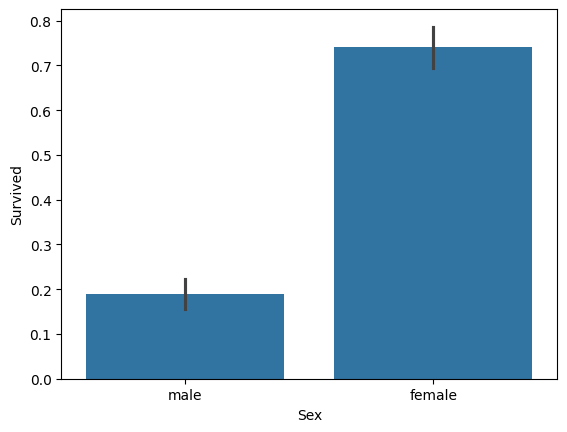

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

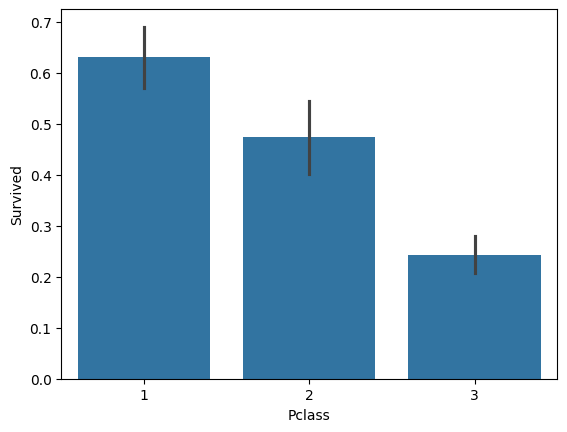

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

In [ ]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
df.groupby('has_cabin')['Survived'].value_counts()

has_cabin  Survived
0          0           481
           1           206
1          1           136
           0            68
Name: count, dtype: int64

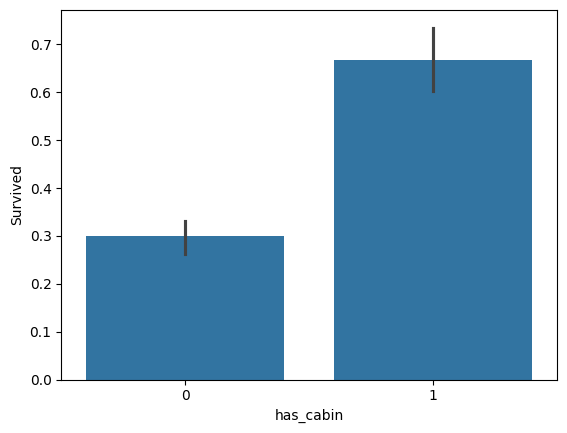

In [ ]:
sns.barplot(x='has_cabin', y='Survived', data=df)
plt.show()

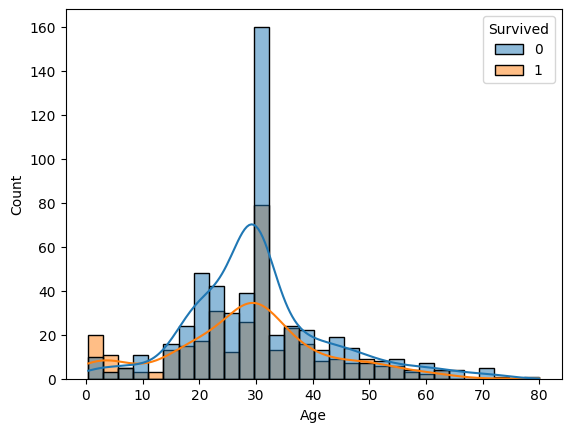

In [ ]:
sns.histplot(data = df , x = 'Age', hue ='Survived', bins = 30 , kde = True )
plt.show()

In [ ]:
new_df = df[['Age','Sex','Pclass','has_cabin','Survived']]

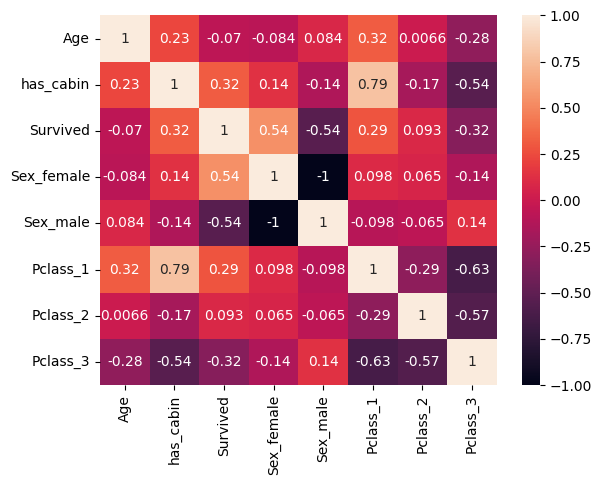

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-create df and necessary preprocessing steps if not already defined
if 'df' not in locals() and 'df' not in globals():
    df = pd.read_csv('titanic.csv')
    df["Age"].fillna(df["Age"].mean(),inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
    df['has_cabin'] = df['Cabin'].notnull().astype(int)
    df.drop(columns=['Cabin'],inplace=True)

# Re-create new_df to ensure it's defined in this scope
new_df = df[['Age','Sex','Pclass','has_cabin','Survived']].copy()
new_df = pd.get_dummies(new_df, columns=['Sex'])
new_df = pd.get_dummies(new_df, columns=['Pclass'])

corr = new_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
new_df.head()

,Age,has_cabin,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,0,False,True,False,False,True
1,38.0,1,1,True,False,True,False,False
2,26.0,0,1,True,False,False,False,True
3,35.0,1,1,True,False,True,False,False
4,35.0,0,0,False,True,False,False,True


In [ ]:
new_df.astype(int)

,Age,has_cabin,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22,0,0,0,1,0,0,1
1,38,1,1,1,0,1,0,0
2,26,0,1,1,0,0,0,1
3,35,1,1,1,0,1,0,0
4,35,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,27,0,0,0,1,0,1,0
887,19,1,1,1,0,1,0,0
888,29,0,0,1,0,0,0,1
889,26,1,1,0,1,1,0,0


##  KNN

**KNN (K-Nearest Neighbors) Definition**

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression.

**It works by:**

Finding the K nearest data points (neighbors) to a new data point

Making a prediction based on the majority class (for classification) or average value (for regression) of those neighbors

* KNN predicts a value by looking at the most similar data points.





.**KNN CLASSIFICATION FORMULA**






**Predicted Class=Mode of K nearest neighbors**



In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
#selected features


X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

x_train = Scaler.fit_transform(X_train)
x_test = Scaler.transform(X_test)

In [ ]:
##training the model


knn_model1 = KNeighborsClassifier(n_neighbors=5)
knn_model1.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred1 = knn_model1.predict(x_test)
y_pred2 = knn_model2.predict(x_test)

In [ ]:
y_pred1

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
y_pred2

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [ ]:
print("Accuracy for k = 3 :", accuracy_score(y_test, y_pred1))
print("Accuracy for k = 5 :", accuracy_score(y_test, y_pred2))

Accuracy for k = 3 : 0.7988826815642458
Accuracy for k = 5 : 0.7988826815642458


In [ ]:
print(classification_report(y_test, y_pred1))   # for k = 3

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
print(classification_report(y_test, y_pred2))  # for k = 5

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



##NAIVE BAYES


🔹 Naive Bayes Definition

Naive Bayes is a supervised machine learning algorithm based on Bayes’ Theorem.
It is mainly used for classification problems.

It is called “naive” because it assumes that all features are independent of each other, which is usually not true in real life.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [ ]:
accuracy_score(y_test, y_pred_nb)

0.776536312849162

In [ ]:
confusion_matrix(y_test, y_pred_nb)

array([[82, 23],
       [17, 57]])

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



##SVM (support vector machine)

Support Vector Machine (SVM) –

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks.
It works by finding the optimal hyperplane that best separates data points of different classes by maximizing the margin between them.


**Key Points of SVM**

 * Uses support vectors (closest data points to the hyperplane)

 * Maximizes the margin between classes

 * Can handle linear and non-linear data using kernel functions

 * Works well with high-dimensional data

**Common Kernels in SVM**

Linear

Polynomial

RBF (Radial Basis Function)

Sigmoid

In [ ]:
from sklearn.svm import SVC


In [ ]:
from sklearn.svm import SVC

model_sv = SVC(kernel='linear')   # linear, rbf, poly


In [ ]:
model_sv = SVC()
model_sv.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_sv = model_sv.predict(x_test)
y_pred_sv

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [ ]:
accuracy_score(y_test, y_pred_sv)

0.8156424581005587

In [ ]:
confusion_matrix(y_test, y_pred_sv)

array([[93, 12],
       [21, 53]])

In [ ]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



##DECISION TREE

**Decision Tree –**

A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks.
It works by splitting the dataset into smaller subsets based on feature conditions, forming a tree-like structure of decision nodes, branches, and leaf nodes to make predictions.


**Key Components**

Root Node – Top node representing the whole dataset

Decision Nodes – Nodes where data is split based on conditions

Leaf Nodes – Final output or prediction

Branches – Represent decision rules

In [ ]:
from sklearn.tree import DecisionTreeClassifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)


In [ ]:
model_dc = DecisionTreeClassifier ()
model_dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dc = model_dc.predict(x_test)
y_pred_dc

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0])

In [ ]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [ ]:
accuracy_score(y_test, y_pred_dc)

0.7653631284916201

In [ ]:
confusion_matrix(y_test, y_pred_dc)

array([[84, 21],
       [21, 53]])

In [ ]:
print(classification_report(y_test, y_pred_dc))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       105
           1       0.72      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

